In [8]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 5.4 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/11.1 MB 4.5 MB/s eta 0:00:03
   --------- ------------------------------ 2.6/11.1 MB 4.3 MB/s eta 0:00:02
   ------------ --------------------------- 3.4/11.1 MB 4.2 MB/s eta 0:00:02
   ---------------- ----------------------- 4.5/11.1 MB 4.1 MB/s eta 0:00:02
   ------------------ --------------------- 5.2/11.1 MB 4.1 MB/s eta 0:00:02
   --------------------- ------------------ 6.0/11.1 MB 4.0 MB/s eta 0:00:02
   ------------------------ --------------- 6.8/11.1 MB 4.0 MB/s eta 0:00:02
   --------------------------- ------------ 7.6/11.1 MB 4.0 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 4.0 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.1 MB 4.0 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.1 MB 4.0 MB/s eta 0:00:01
   --

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [10]:
image_path = "../output_vid/cropped_image.jpg"
image=cv2.imread(image_path)
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

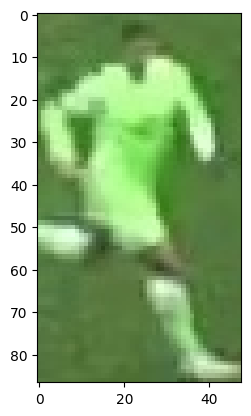

In [11]:
plt.imshow(image)
plt.show()

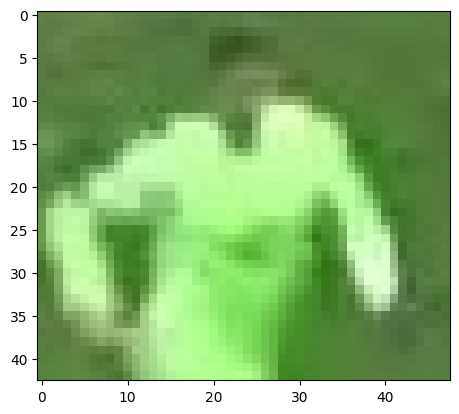

In [12]:
# taking top half of the image
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

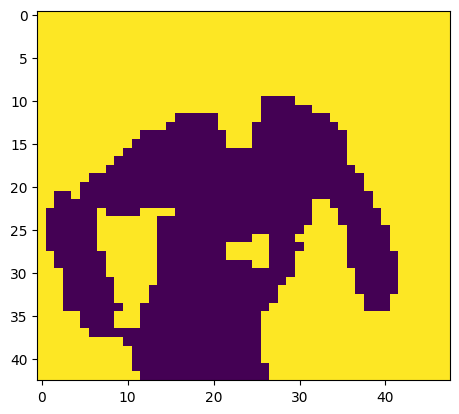

In [16]:
# cluster the image into two clusters

# reshape the image into 2d array
image_2d = top_half_image.reshape(-1,3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the original image shape
clustered_image=labels.reshape(top_half_image.shape[0], image.shape[1])

# display the clustered the image
plt.imshow(clustered_image)
plt.show()

In [17]:
corner_clusters=[clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster=max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [18]:
player_cluster=1-non_player_cluster
print(player_cluster)

0


In [19]:
kmeans.cluster_centers_[player_cluster]

array([171.        , 235.38389262, 142.37718121])